# Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Data Loading

In [ ]:
data = pd.read_csv('/content/CottonCrop&Weather_dataset.csv')

In [ ]:
data.head()

Farm_ID Planting_Date Harvest_Date  Growth_Cycle  Yield  Sunlight_Hours  \
0        1    10-06-2014   18-09-2014           100    205            4.59   
1        2    29-03-2023   18-08-2023           142    250            6.96   
2        4    24-11-2015   04-03-2016           101    273            9.93   
3        5    19-01-2017   08-05-2017           109    244            5.02   
4        6    05-02-2021   14-06-2021           129    293           10.15   

   Precipitation  Average_Temperature  Drought_Days  Flood_Days  \
0            603                   23            57          48   
1            478                   15            27          98   
2            497                   26            70          29   
3            316                   19            28          26   
4            414                   26            60          24   

   Soil_Moisture  Soil_pH  CO2_Concentration  Harvest_Year Sunlight_Level  \
0             49     6.05                429          2014            Low   
1             85     5.45                437          2023     Medium Low   
2             59     4.75                421          2016    Medium High   
3             80     5.83                413          2017     Medium Low   
4             82     6.53                409          2021    Medium High   

  Flood_Level Drought_Level  
0      Severe        Severe  
1     Extreme          Mild  
2    Moderate       Extreme  
3    Moderate      Moderate  
4        Mild        Severe

In [ ]:
data.tail()

Farm_ID Planting_Date Harvest_Date  Growth_Cycle  Yield  \
79995    82910    10-02-2019   06-07-2019           146    269   
79996    82911    05-12-2017   03-04-2018           119    247   
79997    82912    15-02-2016   13-07-2016           149    292   
79998    82913    24-11-2016   09-03-2017           105    216   
79999    82914    02-08-2018   22-01-2019           173    200   

       Sunlight_Hours  Precipitation  Average_Temperature  Drought_Days  \
79995            8.30            507                   23            78   
79996            8.50            410                   32            53   
79997           11.44            495                   32            52   
79998            4.32            593                   21            67   
79999            4.52            676                   30            56   

       Flood_Days  Soil_Moisture  Soil_pH  CO2_Concentration  Harvest_Year  \
79995          34             94     4.84                426          2019   
79996          57             53     4.80                432          2018   
79997         103             66     6.85                417          2016   
79998          13             70     5.89                402          2017   
79999         133             95     6.03                407          2019   

      Sunlight_Level Flood_Level Drought_Level  
79995         Medium    Moderate        Severe  
79996         Medium      Severe        Severe  
79997           High     Extreme      Moderate  
79998            Low        Mild       Extreme  
79999            Low     Extreme      Moderate

# Data Preparation

In [ ]:
data.describe(include='all').T

count unique         top   freq         mean  \
Farm_ID              80000.0    NaN         NaN    NaN   41469.6118   
Planting_Date          80000   3911  06-04-2021     38          NaN   
Harvest_Date           80000   3913  25-10-2013     39          NaN   
Growth_Cycle         80000.0    NaN         NaN    NaN   139.905025   
Yield                80000.0    NaN         NaN    NaN   254.454387   
Sunlight_Hours       80000.0    NaN         NaN    NaN     8.001039   
Precipitation        80000.0    NaN         NaN    NaN   499.682525   
Average_Temperature  80000.0    NaN         NaN    NaN    25.013775   
Drought_Days         80000.0    NaN         NaN    NaN    62.396425   
Flood_Days           80000.0    NaN         NaN    NaN      62.5975   
Soil_Moisture        80000.0    NaN         NaN    NaN    60.044112   
Soil_pH              80000.0    NaN         NaN    NaN     5.998442   
CO2_Concentration    80000.0    NaN         NaN    NaN   424.942588   
Harvest_Year         80000.0    NaN         NaN    NaN  2018.174612   
Sunlight_Level         80000      5  Medium Low  20061          NaN   
Flood_Level            79237      4     Extreme  22876          NaN   
Drought_Level          79238      4     Extreme  22691          NaN   

                              std     min       25%      50%       75%  \
Farm_ID              23942.954757     1.0  20748.75  41465.5  62191.25   
Planting_Date                 NaN     NaN       NaN      NaN       NaN   
Harvest_Date                  NaN     NaN       NaN      NaN       NaN   
Growth_Cycle            23.379231   100.0     120.0    140.0     160.0   
Yield                   32.749019   200.0     230.0    253.0     278.0   
Sunlight_Hours           2.314981     4.0      5.99      8.0     10.02   
Precipitation          115.683552   300.0     399.0    500.0     600.0   
Average_Temperature      6.058648    15.0      20.0     25.0      30.0   
Drought_Days            30.724072    10.0      37.0     61.0      85.0   
Flood_Days              30.805184    10.0      37.0     61.0      85.0   
Soil_Moisture            23.34969    20.0      40.0     60.0      80.0   
Soil_pH                  0.865429     4.5      5.25      6.0      6.75   
CO2_Concentration       14.717826   400.0     412.0    425.0     438.0   
Harvest_Year             3.069489  2013.0    2016.0   2018.0    2021.0   
Sunlight_Level                NaN     NaN       NaN      NaN       NaN   
Flood_Level                   NaN     NaN       NaN      NaN       NaN   
Drought_Level                 NaN     NaN       NaN      NaN       NaN   

                         max  
Farm_ID              82914.0  
Planting_Date            NaN  
Harvest_Date             NaN  
Growth_Cycle           180.0  
Yield                  376.0  
Sunlight_Hours          12.0  
Precipitation          700.0  
Average_Temperature     35.0  
Drought_Days           144.0  
Flood_Days             144.0  
Soil_Moisture          100.0  
Soil_pH                  7.5  
CO2_Concentration      450.0  
Harvest_Year          2023.0  
Sunlight_Level           NaN  
Flood_Level              NaN  
Drought_Level            NaN

Most of the variables are normally distributed since mean = median(50%).
It give the descriptive statistics of the dataset. giving the min and max values of all the numerical variables in the dataset.

The frequency of the categorical variable.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Farm_ID              80000 non-null  int64  
 1   Planting_Date        80000 non-null  object 
 2   Harvest_Date         80000 non-null  object 
 3   Growth_Cycle         80000 non-null  int64  
 4   Yield                80000 non-null  int64  
 5   Sunlight_Hours       80000 non-null  float64
 6   Precipitation        80000 non-null  int64  
 7   Average_Temperature  80000 non-null  int64  
 8   Drought_Days         80000 non-null  int64  
 9   Flood_Days           80000 non-null  int64  
 10  Soil_Moisture        80000 non-null  int64  
 11  Soil_pH              80000 non-null  float64
 12  CO2_Concentration    80000 non-null  int64  
 13  Harvest_Year         80000 non-null  int64  
 14  Sunlight_Level       80000 non-null  object 
 15  Flood_Level          79237 non-null 

The flood level and drought level variables has null values. And the datatypes of each and very variable is listed.

In [ ]:
data.shape

(80000, 17)

## Checking null values

In [ ]:
data.isnull().sum()

Farm_ID                  0
Planting_Date            0
Harvest_Date             0
Growth_Cycle             0
Yield                    0
Sunlight_Hours           0
Precipitation            0
Average_Temperature      0
Drought_Days             0
Flood_Days               0
Soil_Moisture            0
Soil_pH                  0
CO2_Concentration        0
Harvest_Year             0
Sunlight_Level           0
Flood_Level            763
Drought_Level          762
dtype: int64

In [ ]:
#data['Flood_Level'] = data['Flood_Level'].fillna(data['Flood_Level'].mode()[0])
#data['Drought_Level'] = data['Drought_Level'].fillna(data['Drought_Level'].mode()[0])
# Replacing the null values of flood and drought level with the mode value is not appropriate attached the screenshot. So dropping the rows with null values.

In [ ]:
# Drop rows with null values
data = data.dropna()

# Reset the index
data = data.reset_index(drop = True)

In [ ]:
data.isnull().sum()

Farm_ID                0
Planting_Date          0
Harvest_Date           0
Growth_Cycle           0
Yield                  0
Sunlight_Hours         0
Precipitation          0
Average_Temperature    0
Drought_Days           0
Flood_Days             0
Soil_Moisture          0
Soil_pH                0
CO2_Concentration      0
Harvest_Year           0
Sunlight_Level         0
Flood_Level            0
Drought_Level          0
dtype: int64

## Checking Duplicate values

In [ ]:
data = data.drop(['Farm_ID'], axis=1)

In [ ]:
dups = data.duplicated()
print(f'Number of duplicate items {dups.sum()}')

Number of duplicate items 0


## Featured engineering

In [ ]:
# Convert date columns from object to datetime format
data['Planting_Date'] = pd.to_datetime(data['Planting_Date'], format='%d-%m-%Y', errors='coerce')
data['Harvest_Date'] = pd.to_datetime(data['Harvest_Date'], format='%d-%m-%Y', errors='coerce')

In [ ]:
#Extracting month from the date
data['Planting_Month'] = data['Planting_Date'].dt.month
data['Harvest_Month'] = data['Harvest_Date'].dt.month

In [ ]:
# dropping the variables
data = data.drop(['Planting_Date', 'Harvest_Date'], axis=1)

In [ ]:
## calculating the normal days.
data['Normal_days'] = data['Growth_Cycle'] - data['Drought_Days'] - data['Flood_Days']

The normal day is calculated by subracting the flood and drought days from the growth cycle days. The normal days will be negative if the growth cycle is completely on the flood or drought days.

In [ ]:
data.head()

Growth_Cycle  Yield  Sunlight_Hours  Precipitation  Average_Temperature  \
0           100    205            4.59            603                   23   
1           142    250            6.96            478                   15   
2           101    273            9.93            497                   26   
3           109    244            5.02            316                   19   
4           129    293           10.15            414                   26   

   Drought_Days  Flood_Days  Soil_Moisture  Soil_pH  CO2_Concentration  \
0            57          48             49     6.05                429   
1            27          98             85     5.45                437   
2            70          29             59     4.75                421   
3            28          26             80     5.83                413   
4            60          24             82     6.53                409   

   Harvest_Year Sunlight_Level Flood_Level Drought_Level  Planting_Month  \
0          2014            Low      Severe        Severe               6   
1          2023     Medium Low     Extreme          Mild               3   
2          2016    Medium High    Moderate       Extreme              11   
3          2017     Medium Low    Moderate      Moderate               1   
4          2021    Medium High        Mild        Severe               2   

   Harvest_Month  Normal_days  
0              9           -5  
1              8           17  
2              3            2  
3              5           55  
4              6           45

## Outlier checking and handling

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78483 entries, 0 to 78482
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Growth_Cycle         78483 non-null  int64  
 1   Yield                78483 non-null  int64  
 2   Sunlight_Hours       78483 non-null  float64
 3   Precipitation        78483 non-null  int64  
 4   Average_Temperature  78483 non-null  int64  
 5   Drought_Days         78483 non-null  int64  
 6   Flood_Days           78483 non-null  int64  
 7   Soil_Moisture        78483 non-null  int64  
 8   Soil_pH              78483 non-null  float64
 9   CO2_Concentration    78483 non-null  int64  
 10  Harvest_Year         78483 non-null  int64  
 11  Sunlight_Level       78483 non-null  object 
 12  Flood_Level          78483 non-null  object 
 13  Drought_Level        78483 non-null  object 
 14  Planting_Month       78483 non-null  int32  
 15  Harvest_Month        78483 non-null 

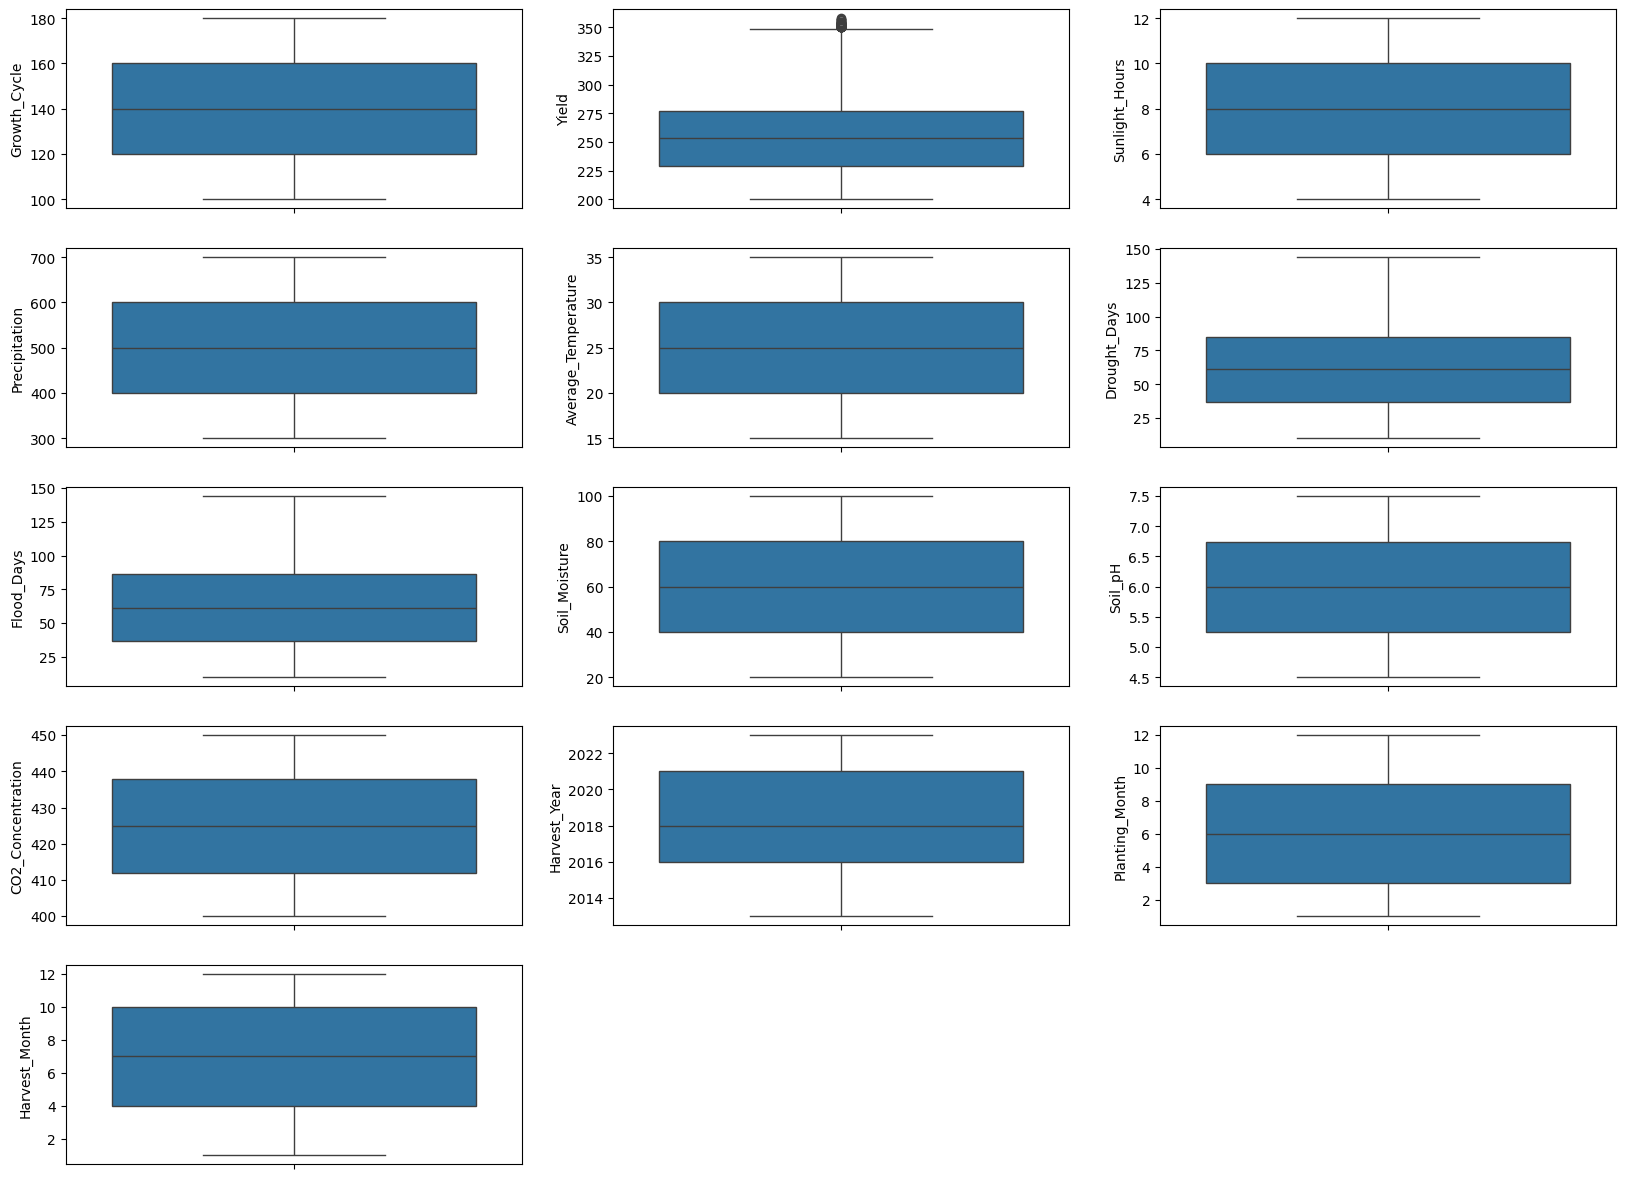

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(5,3,1)
sns.boxplot(y='Growth_Cycle', data=data)

plt.subplot(5,3,2)
sns.boxplot(y='Yield', data=data)

plt.subplot(5,3,3)
sns.boxplot(y='Sunlight_Hours', data=data)

plt.subplot(5,3,4)
sns.boxplot(y='Precipitation', data=data)

plt.subplot(5,3,5)
sns.boxplot(y='Average_Temperature', data=data)

plt.subplot(5,3,6)
sns.boxplot(y='Drought_Days', data=data)

plt.subplot(5,3,7)
sns.boxplot(y='Flood_Days', data=data)

plt.subplot(5,3,8)
sns.boxplot(y='Soil_Moisture', data=data)

plt.subplot(5,3,9)
sns.boxplot(y='Soil_pH', data=data)

plt.subplot(5,3,10)
sns.boxplot(y='CO2_Concentration', data=data)

plt.subplot(5,3,11)
sns.boxplot(y='Harvest_Year', data=data)

plt.subplot(5,3,12)
sns.boxplot(y='Planting_Month', data=data)

plt.subplot(5,3,13)
sns.boxplot(y='Harvest_Month', data=data)

plt.show()

The yield the target variable has the outlier other variables doesnt have any outliers.

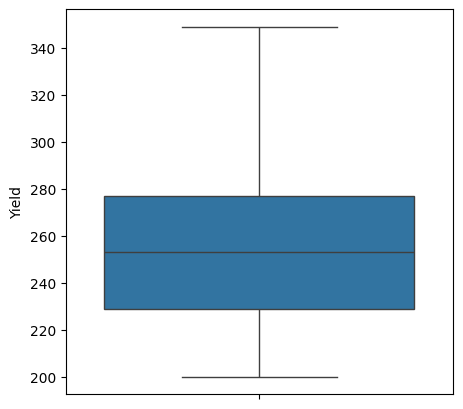

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

lrmc, urmc = remove_outlier(data['Yield']) #return the lower and upper limit for miles cooked.
data['Yield'] = np.where(data['Yield']>urmc, urmc, data['Yield']) #upper limit capping.
data['Yield'] = np.where(data['Yield']<lrmc, lrmc, data['Yield']) #lower limit capping.

plt.figure(figsize=(5,5))
sns.boxplot(y='Yield', data=data)
plt.show()

# Data Visualization

**Trend of planting and harvest over time**

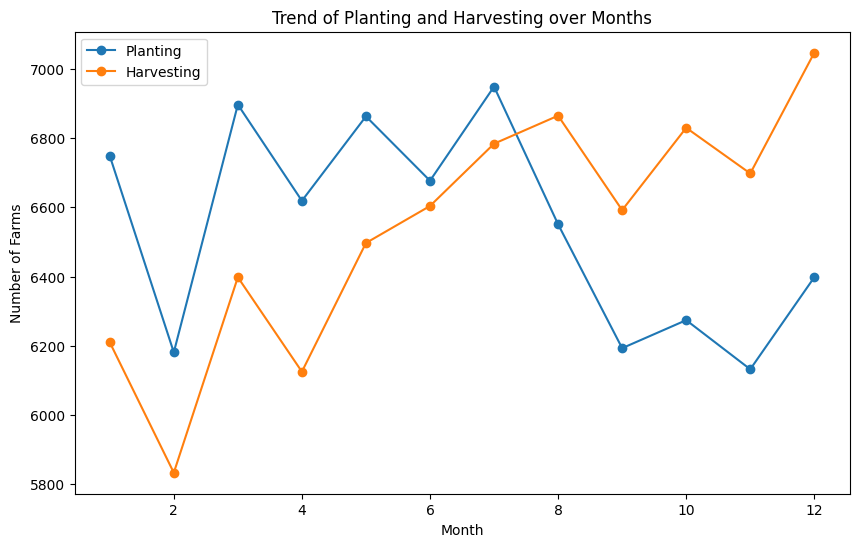

In [ ]:
# Count the number of farms planting and harvesting crops per year
planting_counts = data.groupby(data['Planting_Month'])['Planting_Month'].count()
harvest_counts = data.groupby(data['Harvest_Month'])['Harvest_Month'].count()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(planting_counts.index, planting_counts.values, label='Planting', marker='o')
plt.plot(harvest_counts.index, harvest_counts.values, label='Harvesting', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Farms')
plt.title('Trend of Planting and Harvesting over Months')
plt.legend()
plt.show()

Planting peaks in specific months (e.g., January, March, July) and dips in others, possibly influenced by seasonal or environmental conditions.

Harvesting shows an upward trend across months likely aligned with the completion of the growth cycle.

The planting is higher during the 1st half of the year and the harvest is higher during the 2nd half of the year.

**Growth Duration Over Time**

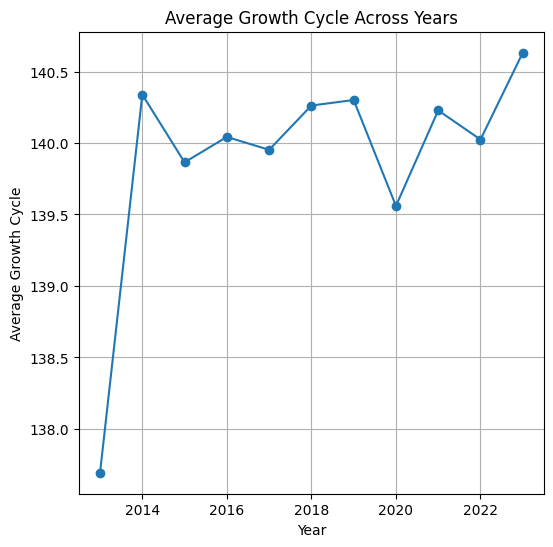

In [ ]:
# Calculate the average growth cycle for each year
average_growth_by_year = data.groupby('Harvest_Year')['Growth_Cycle'].mean()

# Create the line chart
plt.figure(figsize=(6, 6))
plt.plot(average_growth_by_year.index, average_growth_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Growth Cycle')
plt.title('Average Growth Cycle Across Years')
plt.grid(True)
plt.show()

Growth duration is almost consistent across the years.

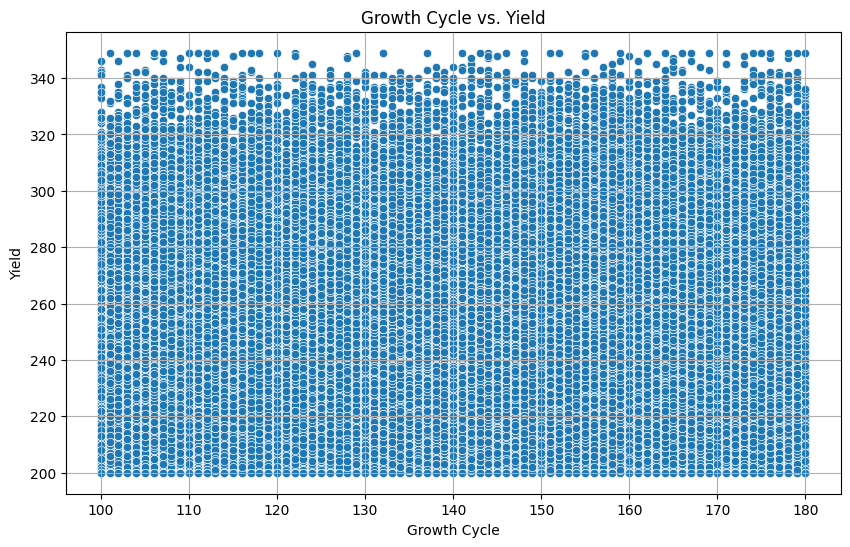

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Growth_Cycle', y='Yield', data=data)
plt.xlabel('Growth Cycle')
plt.ylabel('Yield')
plt.title('Growth Cycle vs. Yield')
plt.grid(True)
plt.show()

Irrespective of growth cycle the yield remains the same.

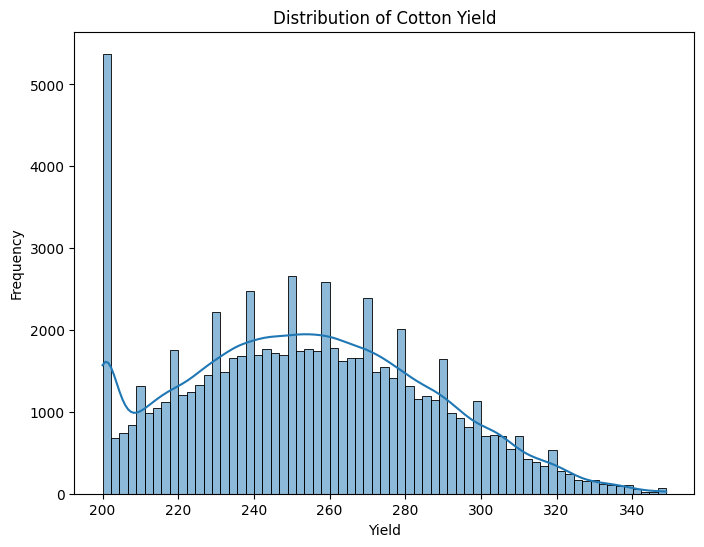

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Yield'], kde=True)
plt.title('Distribution of Cotton Yield')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.show()

The yield value is almost normally distributed.

#### Sunlight variables

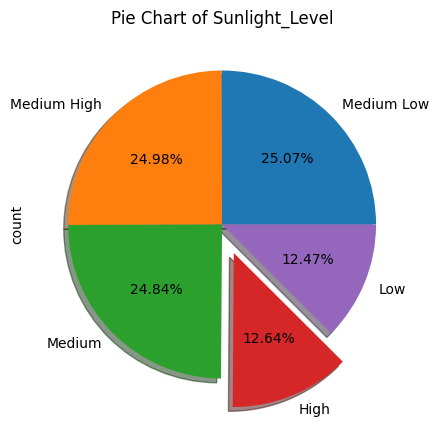

In [ ]:
data['Sunlight_Level'].value_counts().plot(kind='pie', autopct="%1.2f%%", explode=[0,0,0,0.2,0], shadow=True, figsize=(6, 5))
plt.title('Pie Chart of Sunlight_Level')
plt.show()

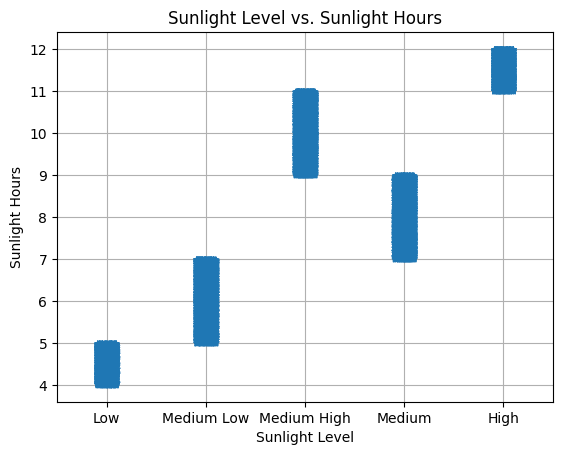

In [ ]:
sns.stripplot(x='Sunlight_Level', y='Sunlight_Hours', data=data, marker='*', jitter=True)
plt.title('Sunlight Level vs. Sunlight Hours')
plt.xlabel('Sunlight Level')
plt.ylabel('Sunlight Hours')
plt.grid()
plt.show()

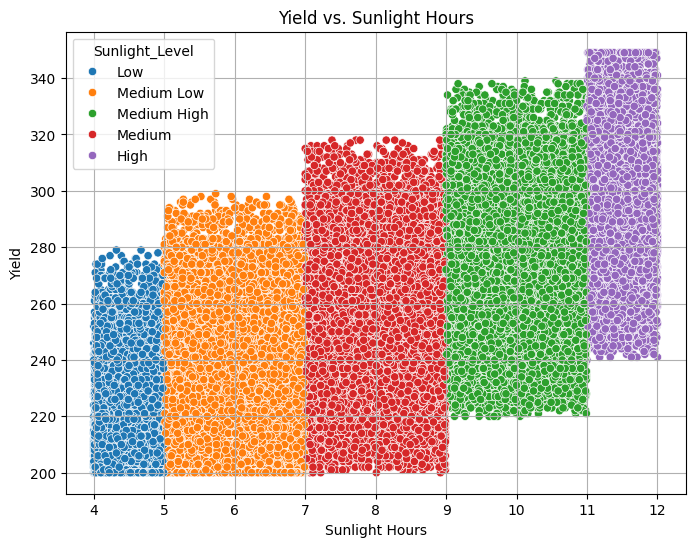

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sunlight_Hours', y='Yield', data=data, hue='Sunlight_Level')
plt.title('Yield vs. Sunlight Hours')
plt.xlabel('Sunlight Hours')
plt.ylabel('Yield')
plt.grid(True)
plt.show()

Yield increases with increase in the level of sunlight and the duration of sunlight.

#### Flood variables

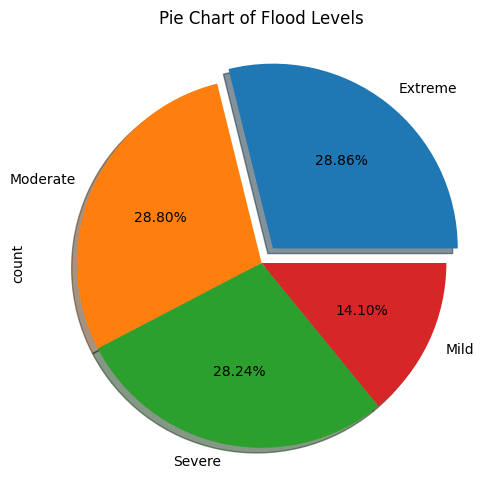

In [ ]:
plt.figure(figsize=(6, 6))
data['Flood_Level'].value_counts().plot(kind='pie', autopct="%1.2f%%",explode=[0.1,0,0,0], shadow=True)
plt.title('Pie Chart of Flood Levels')
plt.show()

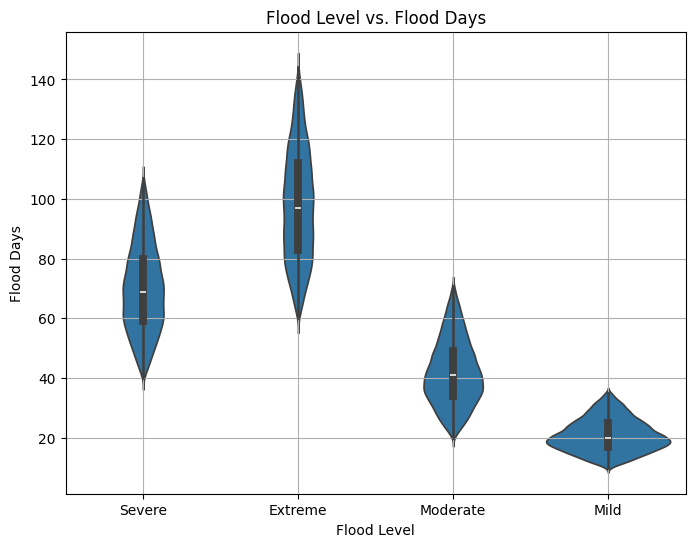

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Flood_Level', y='Flood_Days', data=data)
plt.title('Flood Level vs. Flood Days')
plt.xlabel('Flood Level')
plt.ylabel('Flood Days')
plt.grid(True)
plt.show()

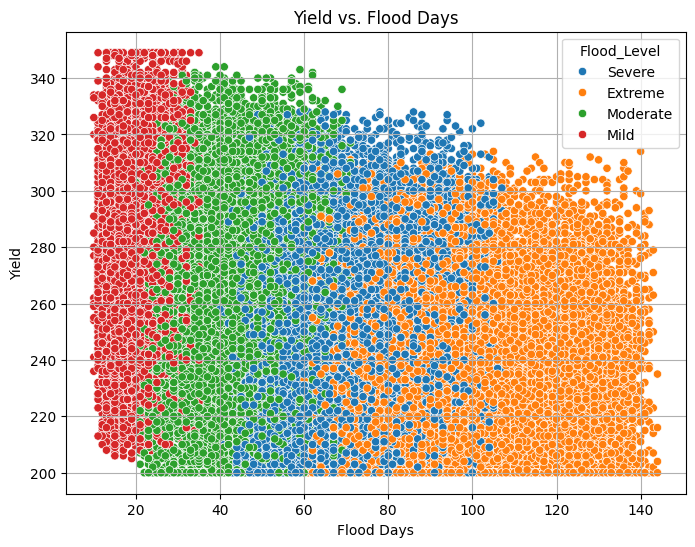

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Flood_Days', y='Yield', data=data, hue='Flood_Level')
plt.title('Yield vs. Flood Days')
plt.xlabel('Flood Days')
plt.ylabel('Yield')
plt.grid(True)
plt.show()

The yield is high in mild to moderate flooded farms than the extreme and severe flooded farms. But the Proportion of the extreme and severe flooded farms constitutes higher portion around 57.51%. The yield decreases with the increase in number of flood days. On lower extreme conditions the yield is good.

#### Drought Variables

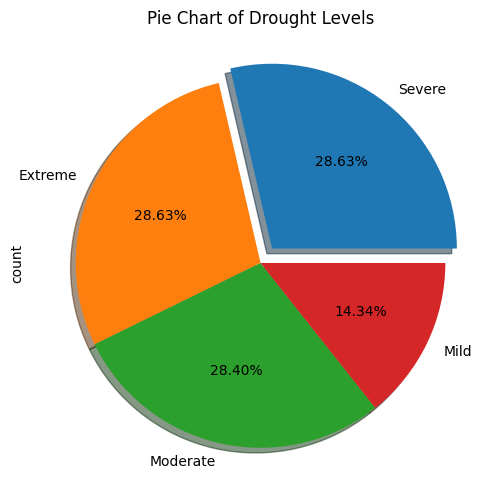

In [ ]:
plt.figure(figsize=(6, 6))
data['Drought_Level'].value_counts().plot(kind='pie', autopct="%1.2f%%",explode=[0.1,0,0,0], shadow=True)
plt.title('Pie Chart of Drought Levels')
plt.show()

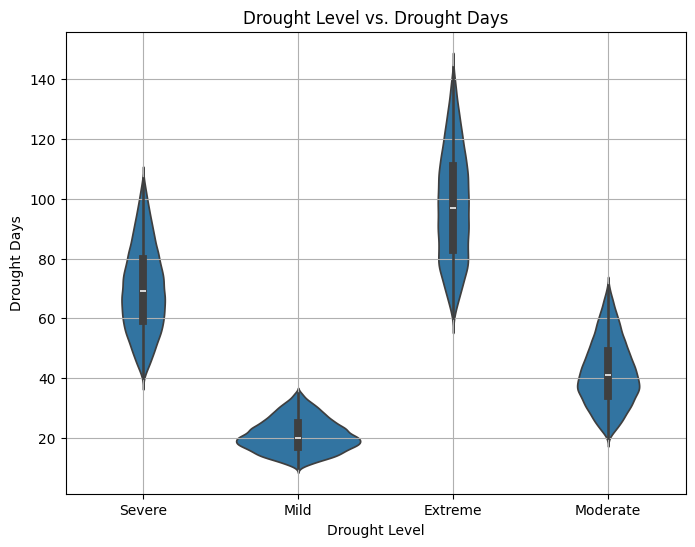

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Drought_Level', y='Drought_Days', data=data)
plt.title('Drought Level vs. Drought Days')
plt.xlabel('Drought Level')
plt.ylabel('Drought Days')
plt.grid(True)
plt.show()

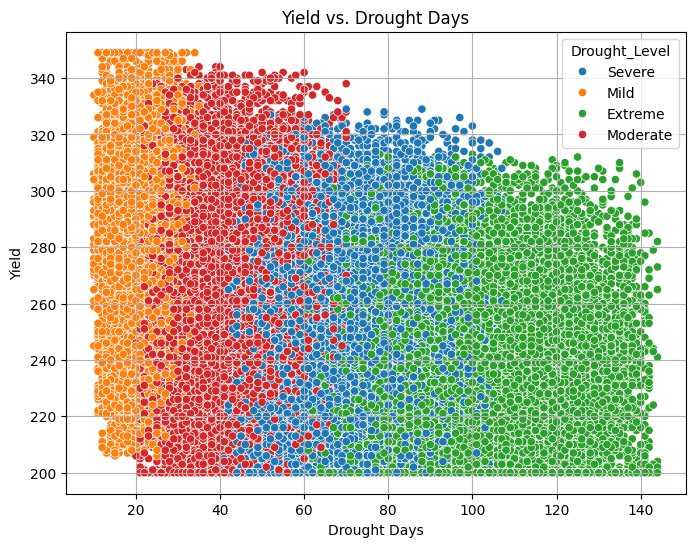

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Drought_Days', y='Yield', data=data, hue='Drought_Level')
plt.title('Yield vs. Drought Days')
plt.xlabel('Drought Days')
plt.ylabel('Yield')
plt.grid(True)
plt.show()

Similar to flood, with increase in the no. of drought days the yield decreases.

#### using the cross tab and stacked bar

In [ ]:
crosstab_data = pd.crosstab(data['Flood_Level'], data['Drought_Level'])
crosstab_data

Drought_Level  Extreme  Mild  Moderate  Severe
Flood_Level                                   
Extreme           6373  3220      6483    6577
Mild              3157  1594      3105    3210
Moderate          6522  3265      6460    6353
Severe            6414  3174      6245    6331

In a year, Around 12704 farms are experiencing both flood and drought conditions to the extreeme and severe levels. And 14424 farms are in good state through out the year facing only mild or moderate flood and drought levels.

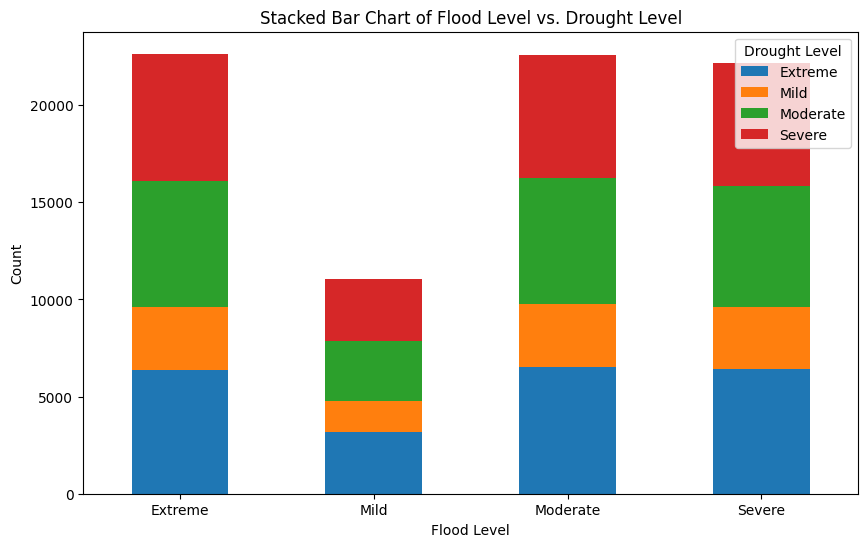

In [ ]:
crosstab_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of Flood Level vs. Drought Level')
plt.xlabel('Flood Level')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Drought Level')
plt.show()

January to March:
Fewer farms are affected across all combinations compared to the latter half of the year.
Mild Drought and Mild Floods show minimal impact, with numbers below 280 farms.

April to June:
A noticeable increase in farms affected for combinations involving Extreme Drought and Floods, peaking in May.

July to December:
Farms affected consistently increase across all combinations, especially for Moderate and Severe levels, with December having the highest values.

<ipython-input-200-7282db471fa4>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Precipitation'], shade=True)


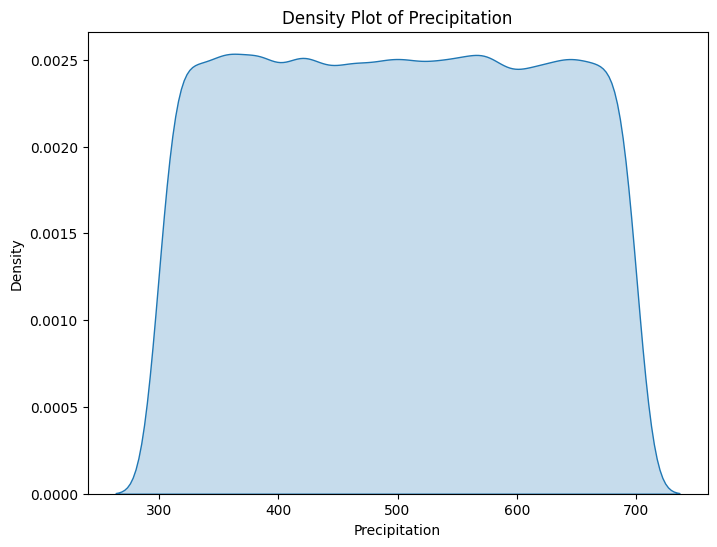

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data['Precipitation'], shade=True)
plt.title('Density Plot of Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Density')
plt.show()

**Soil Ph visuals:**

In [ ]:
# Define the categories and their corresponding ranges for Soil_pH
def categorize_soil_ph(ph_value):
    if ph_value < 6.5:
        return 'Acidic'
    elif 6.5 <= ph_value < 7.5:
        return 'Neutral'
    else:
        return 'Alkaline'

# Apply the function to create a new 'Soil_pH_Category' column
data['Soil_pH_Category'] = data['Soil_pH'].apply(categorize_soil_ph)

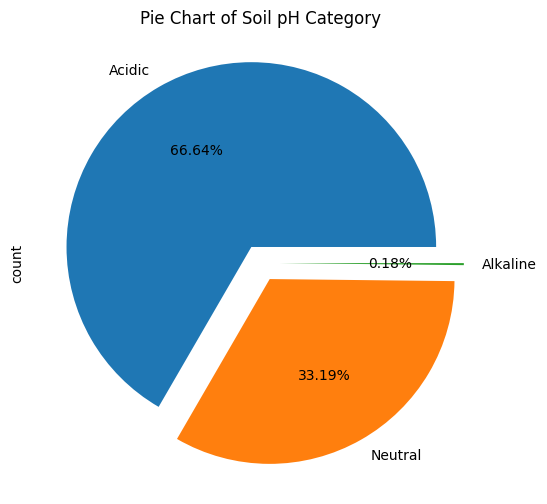

In [ ]:
plt.figure(figsize=(8, 6))
data['Soil_pH_Category'].value_counts().plot(kind='pie', autopct="%1.2f%%", explode=[0.1,0.1,0.1])
plt.title('Pie Chart of Soil pH Category')
plt.show()

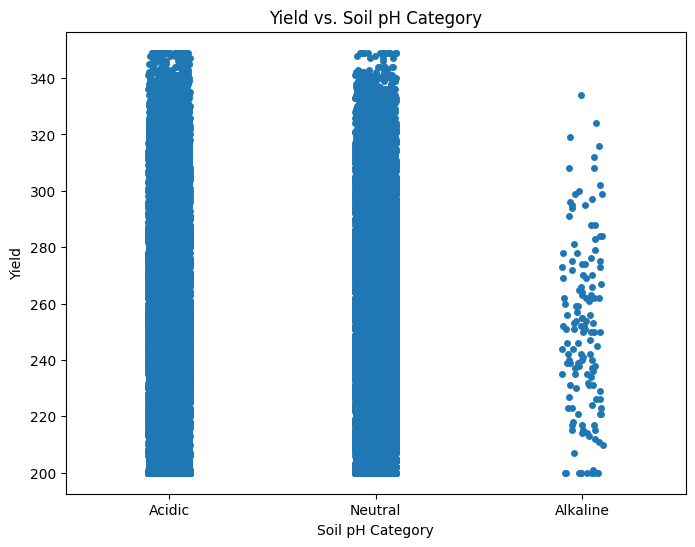

In [ ]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='Soil_pH_Category', y='Yield', data=data)
plt.title('Yield vs. Soil pH Category')
plt.xlabel('Soil pH Category')
plt.ylabel('Yield')
plt.show()

The yield is high with slightly acidic and neutral soils. Also the soil condition in most of the cases are acidic or neutral. The soils with acidict and neutral in nature influence the dataset.

In [ ]:
data.head()

Growth_Cycle  Yield  Sunlight_Hours  Precipitation  Average_Temperature  \
0           100  205.0            4.59            603                   23   
1           142  250.0            6.96            478                   15   
2           101  273.0            9.93            497                   26   
3           109  244.0            5.02            316                   19   
4           129  293.0           10.15            414                   26   

   Drought_Days  Flood_Days  Soil_Moisture  Soil_pH  CO2_Concentration  \
0            57          48             49     6.05                429   
1            27          98             85     5.45                437   
2            70          29             59     4.75                421   
3            28          26             80     5.83                413   
4            60          24             82     6.53                409   

   Harvest_Year Sunlight_Level Flood_Level Drought_Level  Planting_Month  \
0          2014            Low      Severe        Severe               6   
1          2023     Medium Low     Extreme          Mild               3   
2          2016    Medium High    Moderate       Extreme              11   
3          2017     Medium Low    Moderate      Moderate               1   
4          2021    Medium High        Mild        Severe               2   

   Harvest_Month  Normal_days Soil_pH_Category  
0              9           -5           Acidic  
1              8           17           Acidic  
2              3            2           Acidic  
3              5           55           Acidic  
4              6           45          Neutral

In [ ]:
data = data.drop(['Soil_pH_Category'], axis=1)

**Seasonal behaviour:**

In [ ]:
#     'Summer'  # April to June
#     'Monsoon' # July to September
#     'Autumn'  # October to November
#     'Winter'  # December to March

# Define a function to map months to seasons
def get_season(month):
    if 4 <= month <= 6:
        return 'Summer'
    elif 7 <= month <= 9:
        return 'Monsoon'
    elif 10 <= month <= 11:
        return 'Autumn'
    elif month in [12, 1, 2, 3]:
        return 'Winter'
    else:
        return 'Unknown'  # Handle cases outside the defined ranges

# Apply the function to create a new 'Planting_Season' column
data['Planting_Season'] = data['Planting_Month'].apply(get_season)

# Apply the function to create a new 'Harvest_Season' column
data['Harvest_Season'] = data['Harvest_Month'].apply(get_season)

In [ ]:
data.head()

Growth_Cycle  Yield  Sunlight_Hours  Precipitation  Average_Temperature  \
0           100  205.0            4.59            603                   23   
1           142  250.0            6.96            478                   15   
2           101  273.0            9.93            497                   26   
3           109  244.0            5.02            316                   19   
4           129  293.0           10.15            414                   26   

   Drought_Days  Flood_Days  Soil_Moisture  Soil_pH  CO2_Concentration  \
0            57          48             49     6.05                429   
1            27          98             85     5.45                437   
2            70          29             59     4.75                421   
3            28          26             80     5.83                413   
4            60          24             82     6.53                409   

   Harvest_Year Sunlight_Level Flood_Level Drought_Level  Planting_Month  \
0          2014            Low      Severe        Severe               6   
1          2023     Medium Low     Extreme          Mild               3   
2          2016    Medium High    Moderate       Extreme              11   
3          2017     Medium Low    Moderate      Moderate               1   
4          2021    Medium High        Mild        Severe               2   

   Harvest_Month  Normal_days Planting_Season Harvest_Season  
0              9           -5          Summer        Monsoon  
1              8           17          Winter        Monsoon  
2              3            2          Autumn         Winter  
3              5           55          Winter         Summer  
4              6           45          Winter         Summer

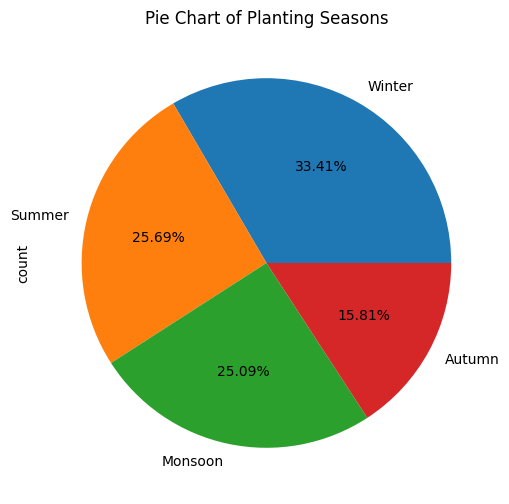

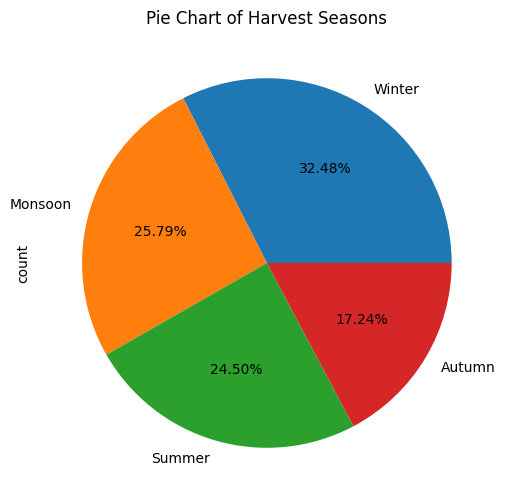

In [ ]:
plt.figure(figsize=(8, 6))
data['Planting_Season'].value_counts().plot(kind='pie', autopct="%1.2f%%")
plt.title('Pie Chart of Planting Seasons')
plt.show()

plt.figure(figsize=(8, 6))
data['Harvest_Season'].value_counts().plot(kind='pie', autopct="%1.2f%%")
plt.title('Pie Chart of Harvest Seasons')
plt.show()

Planting_Season  Autumn  Monsoon  Summer  Winter
Harvest_Season                                  
Autumn                0     3954    9574       0
Monsoon               0        0    9484   10757
Summer             4386        0       0   14840
Winter             8020    15739    1101     628


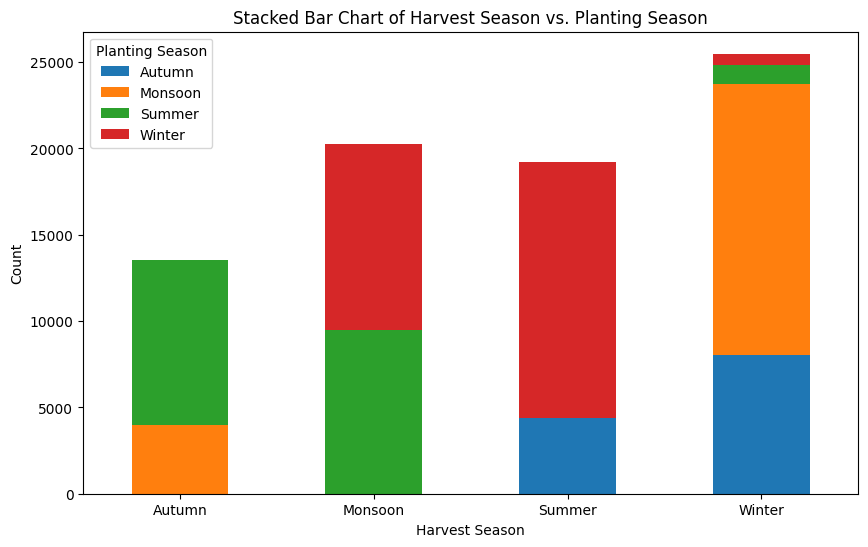

In [ ]:
# Create the cross-tabulation
cross_tab = pd.crosstab(data['Harvest_Season'], data['Planting_Season'])
print(cross_tab)
# Create the stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of Harvest Season vs. Planting Season')
plt.xlabel('Harvest Season')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Planting Season')
plt.show()

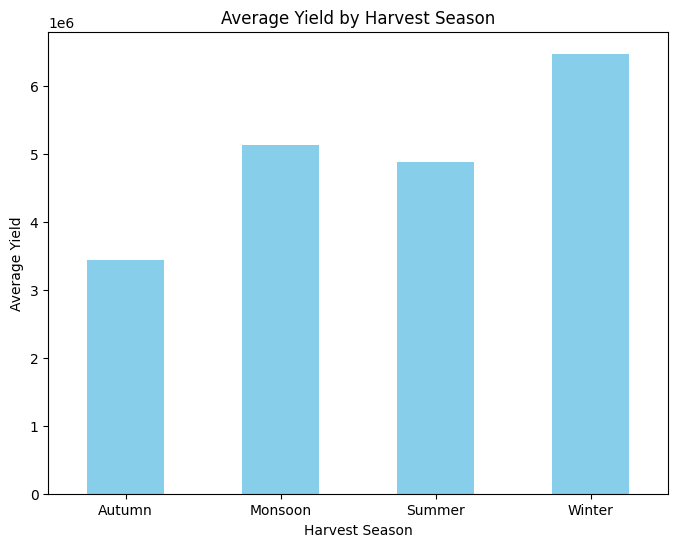

In [ ]:
# Group data by harvest season and calculate the mean yield for each season
season_yield = data.groupby('Harvest_Season')['Yield'].sum()
# Create the bar plot
plt.figure(figsize=(8, 6))
season_yield.plot(kind='bar', color='skyblue')
plt.title('Average Yield by Harvest Season')
plt.xlabel('Harvest Season')
plt.ylabel('Average Yield')
plt.xticks(rotation=0)
plt.show()

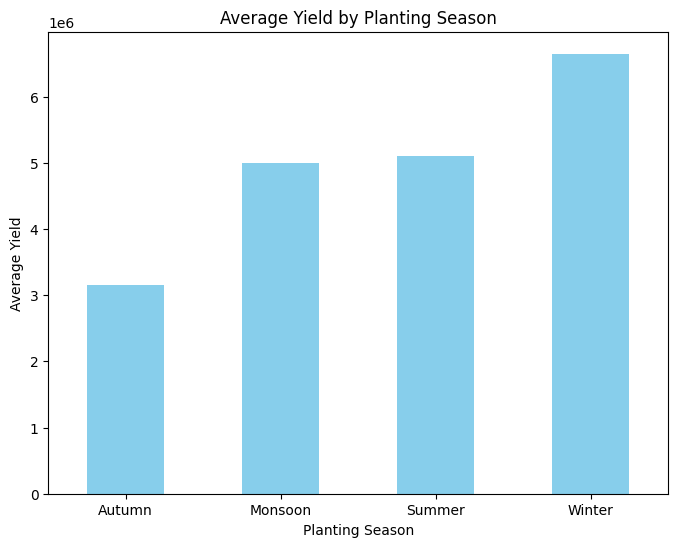

In [ ]:
season_yield = data.groupby('Planting_Season')['Yield'].sum()
# Create the bar plot
plt.figure(figsize=(8, 6))
season_yield.plot(kind='bar', color='skyblue')
plt.title('Average Yield by Planting Season')
plt.xlabel('Planting Season')
plt.ylabel('Average Yield')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#data = data.drop(['Planting_Season', 'Harvest_Season'], axis=1)

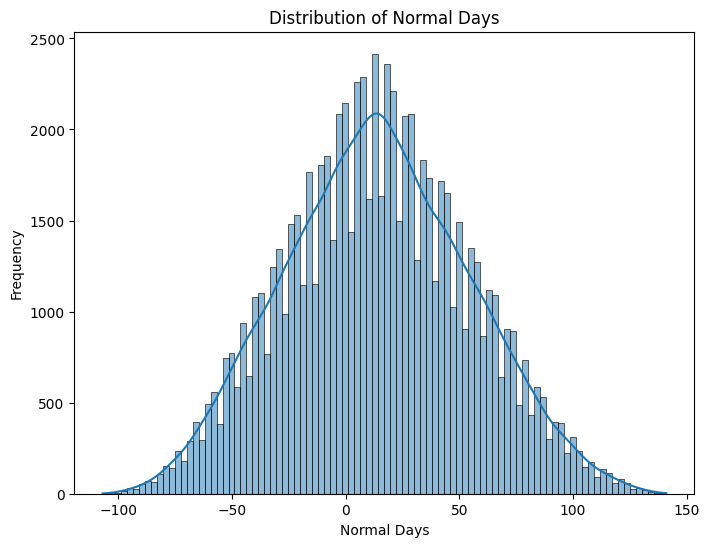

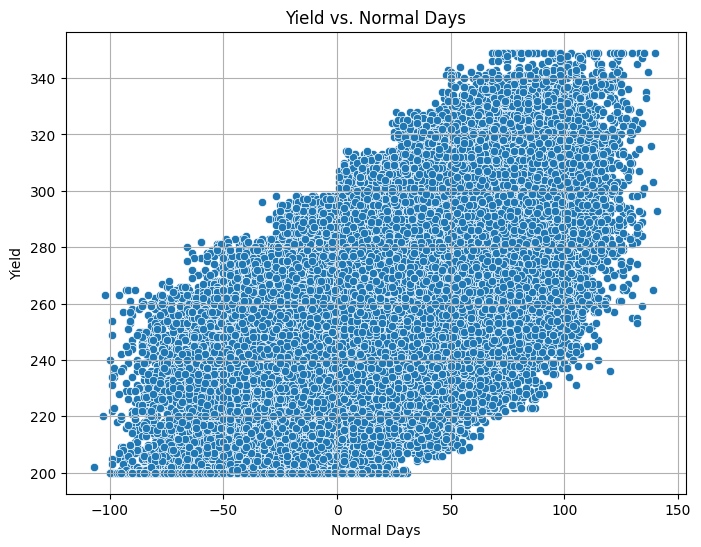

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Normal_days'], kde=True)
plt.title('Distribution of Normal Days')
plt.xlabel('Normal Days')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Normal_days', y='Yield', data=data)
plt.title('Yield vs. Normal Days')
plt.xlabel('Normal Days')
plt.ylabel('Yield')
plt.grid(True)
plt.show()



The yield shows a linear relationship with increase in the no of normal days.

## Correlation Matrix

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78483 entries, 0 to 78482
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Growth_Cycle         78483 non-null  int64  
 1   Yield                78483 non-null  float64
 2   Sunlight_Hours       78483 non-null  float64
 3   Precipitation        78483 non-null  int64  
 4   Average_Temperature  78483 non-null  int64  
 5   Drought_Days         78483 non-null  int64  
 6   Flood_Days           78483 non-null  int64  
 7   Soil_Moisture        78483 non-null  int64  
 8   Soil_pH              78483 non-null  float64
 9   CO2_Concentration    78483 non-null  int64  
 10  Harvest_Year         78483 non-null  int64  
 11  Sunlight_Level       78483 non-null  object 
 12  Flood_Level          78483 non-null  object 
 13  Drought_Level        78483 non-null  object 
 14  Planting_Month       78483 non-null  int32  
 15  Harvest_Month        78483 non-null 

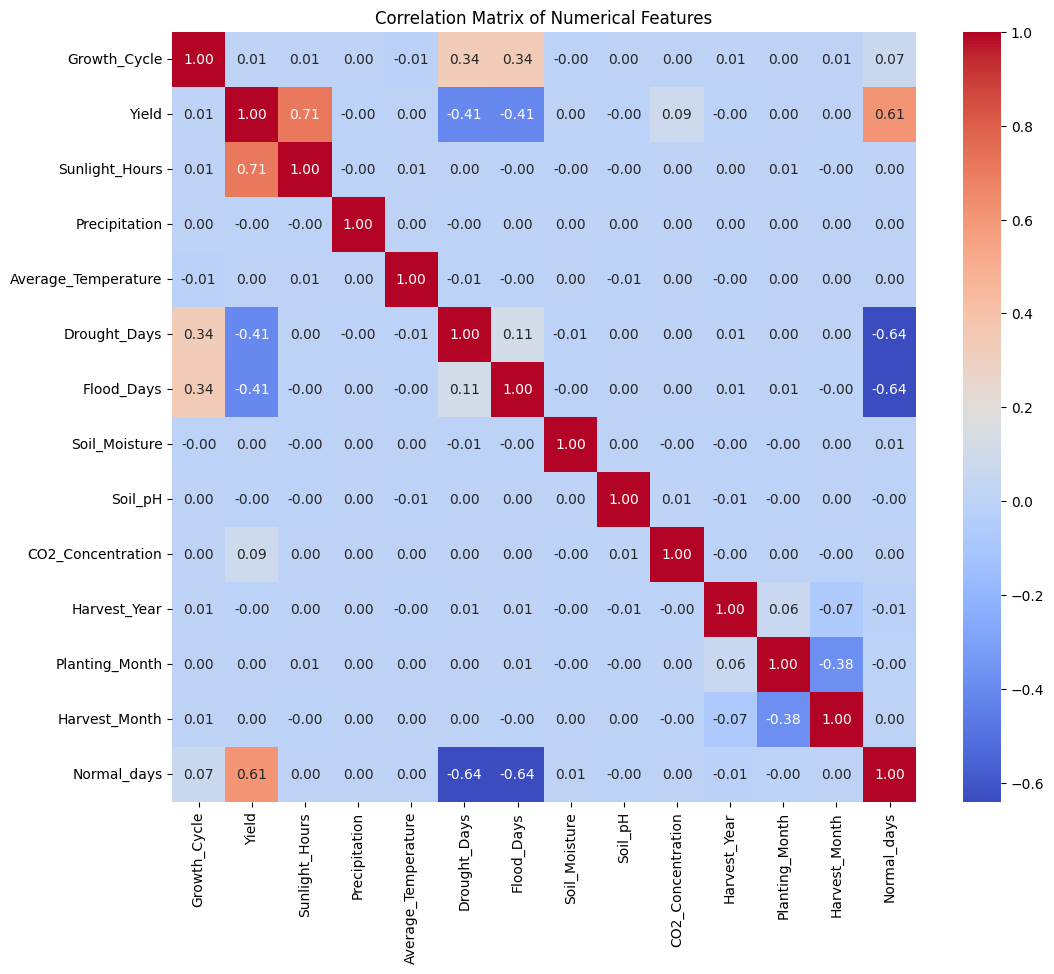

In [ ]:
# Calculate the correlation matrix for numerical columns
numerical_cols = data.select_dtypes(include=['number'])
correlation_matrix = numerical_cols.corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Label Encoding:**

In [ ]:
# Manual label encoding for categorical variables
# Replace these with the actual labels you want for each category
label_mapping = {
    'Sunlight_Level': {'Low': 0, 'Medium Low': 1, 'Medium': 2, 'Medium High': 3, 'High': 4},
    'Flood_Level': {'Mild': 0, 'Moderate': 1, 'Severe': 2, 'Extreme': 3},
    'Drought_Level': {'Mild': 0, 'Moderate': 1, 'Severe': 2, 'Extreme': 3}
}

for col, mapping in label_mapping.items():
    data[col] = data[col].map(mapping)

In [ ]:
data.head()

Growth_Cycle  Yield  Sunlight_Hours  Precipitation  Average_Temperature  \
0           100  205.0            4.59            603                   23   
1           142  250.0            6.96            478                   15   
2           101  273.0            9.93            497                   26   
3           109  244.0            5.02            316                   19   
4           129  293.0           10.15            414                   26   

   Drought_Days  Flood_Days  Soil_Moisture  Soil_pH  CO2_Concentration  \
0            57          48             49     6.05                429   
1            27          98             85     5.45                437   
2            70          29             59     4.75                421   
3            28          26             80     5.83                413   
4            60          24             82     6.53                409   

   Harvest_Year  Sunlight_Level  Flood_Level  Drought_Level  Planting_Month  \
0          2014               0            2              2               6   
1          2023               1            3              0               3   
2          2016               3            1              3              11   
3          2017               1            1              1               1   
4          2021               3            0              2               2   

   Harvest_Month  Normal_days Planting_Season Harvest_Season  
0              9           -5          Summer        Monsoon  
1              8           17          Winter        Monsoon  
2              3            2          Autumn         Winter  
3              5           55          Winter         Summer  
4              6           45          Winter         Summer

**label encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Planting_Season'] = label_encoder.fit_transform(data['Planting_Season'])
data['Harvest_Season'] = label_encoder.fit_transform(data['Harvest_Season'])
data.head()

Growth_Cycle  Yield  Sunlight_Hours  Precipitation  Average_Temperature  \
0           100  205.0            4.59            603                   23   
1           142  250.0            6.96            478                   15   
2           101  273.0            9.93            497                   26   
3           109  244.0            5.02            316                   19   
4           129  293.0           10.15            414                   26   

   Drought_Days  Flood_Days  Soil_Moisture  Soil_pH  CO2_Concentration  \
0            57          48             49     6.05                429   
1            27          98             85     5.45                437   
2            70          29             59     4.75                421   
3            28          26             80     5.83                413   
4            60          24             82     6.53                409   

   Harvest_Year  Sunlight_Level  Flood_Level  Drought_Level  Planting_Month  \
0          2014               0            2              2               6   
1          2023               1            3              0               3   
2          2016               3            1              3              11   
3          2017               1            1              1               1   
4          2021               3            0              2               2   

   Harvest_Month  Normal_days  Planting_Season  Harvest_Season  
0              9           -5                2               1  
1              8           17                3               1  
2              3            2                0               3  
3              5           55                3               2  
4              6           45                3               2

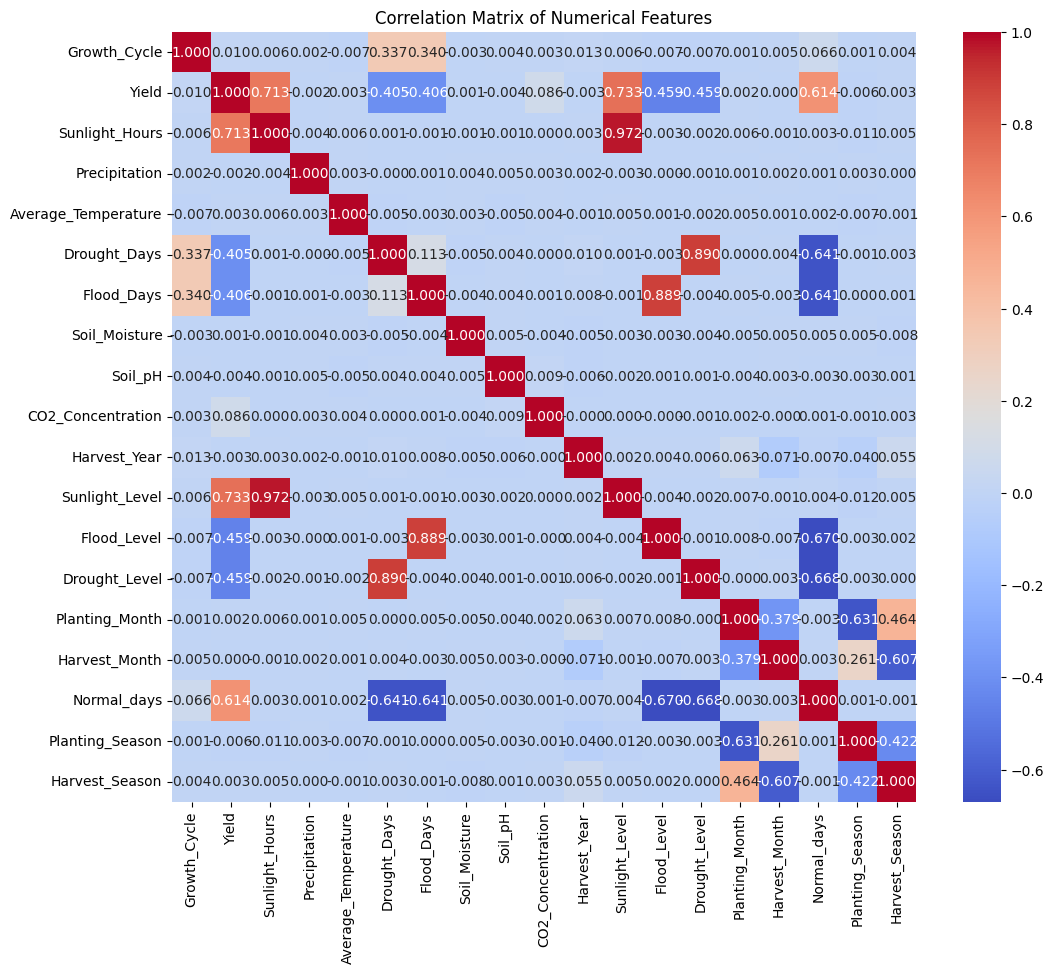

In [ ]:
# Calculate the correlation matrix for numerical columns
numerical_cols = data.select_dtypes(include=['number'])
correlation_matrix = numerical_cols.corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78483 entries, 0 to 78482
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Growth_Cycle         78483 non-null  int64  
 1   Yield                78483 non-null  float64
 2   Sunlight_Hours       78483 non-null  float64
 3   Precipitation        78483 non-null  int64  
 4   Average_Temperature  78483 non-null  int64  
 5   Drought_Days         78483 non-null  int64  
 6   Flood_Days           78483 non-null  int64  
 7   Soil_Moisture        78483 non-null  int64  
 8   Soil_pH              78483 non-null  float64
 9   CO2_Concentration    78483 non-null  int64  
 10  Harvest_Year         78483 non-null  int64  
 11  Sunlight_Level       78483 non-null  int64  
 12  Flood_Level          78483 non-null  int64  
 13  Drought_Level        78483 non-null  int64  
 14  Planting_Month       78483 non-null  int32  
 15  Harvest_Month        78483 non-null 

<ipython-input-221-bb5fb9f4d4ad>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sorted_corr.index, x=corr_with_yield[sorted_corr.index], orient='h', palette="viridis") # Use corr_with_yield here


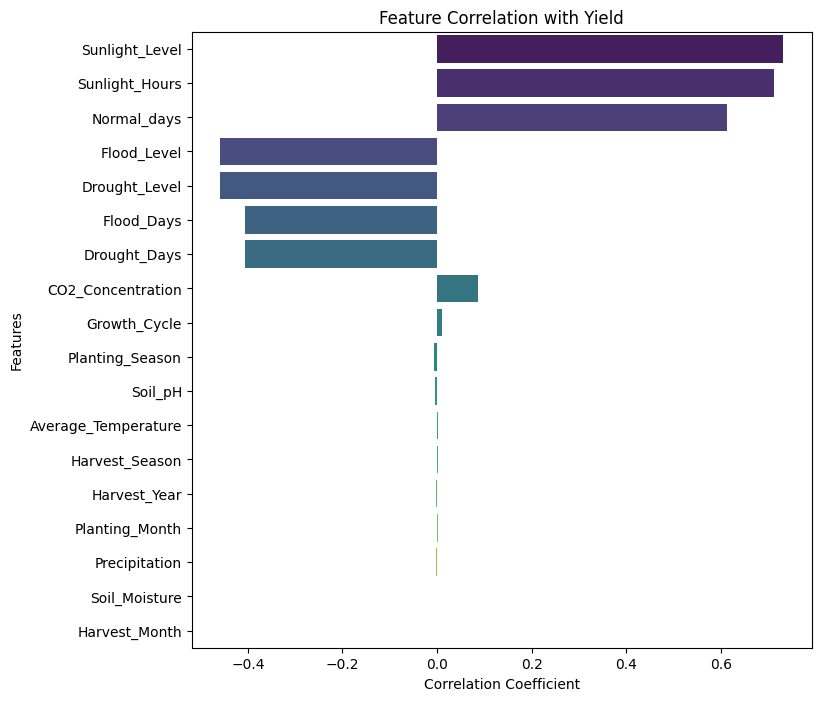

In [ ]:
# Select only numerical features for correlation calculation
numerical_features = data.select_dtypes(include=np.number).columns
corr_matrix = data[numerical_features].corr()

# Get the correlation with 'Yield'
corr_with_yield = corr_matrix['Yield'].drop('Yield')

# Sort the correlations in descending order of absolute value to show both positive and negative correlations
sorted_corr = corr_with_yield.abs().sort_values(ascending=False)

# Create a plot of feature vs correlation
plt.figure(figsize=(8, 8))
sns.barplot(y=sorted_corr.index, x=corr_with_yield[sorted_corr.index], orient='h', palette="viridis") # Use corr_with_yield here
plt.title('Feature Correlation with Yield')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

**Standardization:**


In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()
columns_to_scale = [col for col in data.columns if col != 'Yield']
scaler.fit(data[columns_to_scale])

# Transform the selected columns using the fitted scaler
data[columns_to_scale] = scaler.transform(data[columns_to_scale])

# Now 'data' DataFrame has standardized numerical columns (except 'Yield')
data.head()

Growth_Cycle  Yield  Sunlight_Hours  Precipitation  Average_Temperature  \
0     -1.710230  205.0       -1.472870       0.893335            -0.332672   
1      0.086519  250.0       -0.449342      -0.187272            -1.653047   
2     -1.667450  273.0        0.833306      -0.023019             0.162469   
3     -1.325212  244.0       -1.287166      -1.587738            -0.992859   
4     -0.469617  293.0        0.928316      -0.740542             0.162469   

   Drought_Days  Flood_Days  Soil_Moisture   Soil_pH  CO2_Concentration  \
0     -0.192799   -0.493445      -0.473140  0.060029           0.275366   
1     -1.176720    1.141974       1.067970 -0.633262           0.818799   
2      0.233566   -1.114904      -0.045054 -1.442101          -0.268067   
3     -1.143922   -1.213030       0.853927 -0.194177          -0.811500   
4     -0.094407   -1.278446       0.939544  0.614662          -1.083217   

   Harvest_Year  Sunlight_Level  Flood_Level  Drought_Level  Planting_Month  \
0     -1.359438       -1.632365     0.273058       0.276016       -0.124609   
1      1.572954       -0.817180     1.243680      -1.663946       -1.000060   
2     -0.707796        0.813191    -0.697565       1.245997        1.334477   
3     -0.381974       -0.817180    -0.697565      -0.693965       -1.583694   
4      0.921311        0.813191    -1.668188       0.276016       -1.291877   

   Harvest_Month  Normal_days  Planting_Season  Harvest_Season  
0       0.683268    -0.467296         0.215968       -0.660601  
1       0.392445     0.073417         1.143203       -0.660601  
2      -1.061672    -0.295251        -1.638501        1.169020  
3      -0.480026     1.007378         1.143203        0.254209  
4      -0.189202     0.761599         1.143203        0.254209

<ipython-input-245-bb5fb9f4d4ad>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sorted_corr.index, x=corr_with_yield[sorted_corr.index], orient='h', palette="viridis") # Use corr_with_yield here


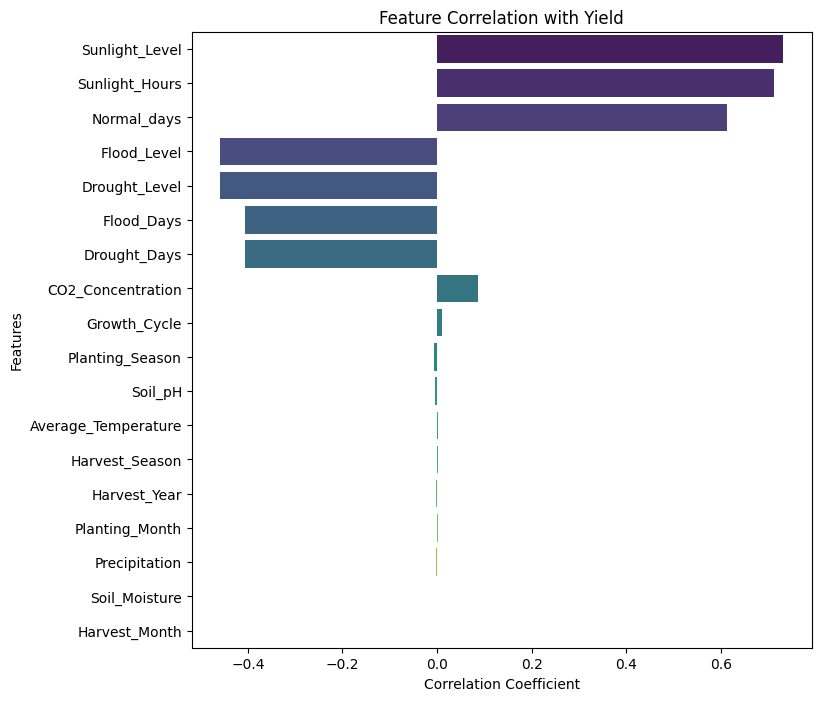

In [ ]:
# Select only numerical features for correlation calculation
numerical_features = data.select_dtypes(include=np.number).columns
corr_matrix = data[numerical_features].corr()

# Get the correlation with 'Yield'
corr_with_yield = corr_matrix['Yield'].drop('Yield')

# Sort the correlations in descending order of absolute value to show both positive and negative correlations
sorted_corr = corr_with_yield.abs().sort_values(ascending=False)

# Create a plot of feature vs correlation
plt.figure(figsize=(8, 8))
sns.barplot(y=sorted_corr.index, x=corr_with_yield[sorted_corr.index], orient='h', palette="viridis") # Use corr_with_yield here
plt.title('Feature Correlation with Yield')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78483 entries, 0 to 78482
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Growth_Cycle         78483 non-null  float64
 1   Yield                78483 non-null  float64
 2   Sunlight_Hours       78483 non-null  float64
 3   Precipitation        78483 non-null  float64
 4   Average_Temperature  78483 non-null  float64
 5   Drought_Days         78483 non-null  float64
 6   Flood_Days           78483 non-null  float64
 7   Soil_Moisture        78483 non-null  float64
 8   Soil_pH              78483 non-null  float64
 9   CO2_Concentration    78483 non-null  float64
 10  Harvest_Year         78483 non-null  float64
 11  Sunlight_Level       78483 non-null  float64
 12  Flood_Level          78483 non-null  float64
 13  Drought_Level        78483 non-null  float64
 14  Planting_Month       78483 non-null  float64
 15  Harvest_Month        78483 non-null 

# Model Building

In [ ]:
X = data.drop('Yield', axis=1)
y = data['Yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed

In [ ]:
X_train.head()

Growth_Cycle  Sunlight_Hours  Precipitation  Average_Temperature  \
49502     -1.325212        0.893767       1.126746             1.152750   
2265       0.899334       -1.049639      -0.023019             0.327515   
36083      1.198793        0.496448       0.521606             1.152750   
17113      1.712149       -0.928716      -1.432130             0.657609   
76731      1.412691        0.798756      -0.239141            -1.157906   

       Drought_Days  Flood_Days  Soil_Moisture   Soil_pH  CO2_Concentration  \
49502      0.495945   -0.526153      -0.601566  0.279571          -1.287004   
2265       0.692729   -1.049488       1.196396  0.579997           0.954657   
36083      0.561540    0.160723       0.682693 -1.638533          -0.471855   
17113      0.266364    0.455098      -1.286504 -1.511430           0.479153   
76731      2.135813    0.651348      -0.644374 -0.344390          -0.743571   

       Harvest_Year  Sunlight_Level  Flood_Level  Drought_Level  \
49502      0.921311        0.813191     0.273058       1.245997   
2265       1.247132       -0.817180    -1.668188       0.276016   
36083      0.921311        0.813191     0.273058       0.276016   
17113      0.269668       -0.817180     0.273058      -0.693965   
76731     -0.707796        0.813191     0.273058       1.245997   

       Planting_Month  Harvest_Month  Normal_days  Planting_Season  \
49502       -1.291877      -0.480026    -0.737653         1.143203   
2265         1.334477      -0.480026     0.786177        -1.638501   
36083       -1.583694      -0.189202     0.147151         1.143203   
17113       -1.583694       0.101621     0.442086         1.143203   
76731       -0.416426       1.264915    -1.278367         0.215968   

       Harvest_Season  
49502        0.254209  
2265         0.254209  
36083        0.254209  
17113       -0.660601  
76731       -1.575412

## Linear Regression Model

In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

**Coefficient values**

In [ ]:
model.coef_ #Modelcoefficient values

array([-8.65638903e-02,  2.71503259e-01, -6.70478820e-03, -7.29049596e-02,
        7.53341578e-02,  9.87510998e-03,  4.53510433e-05, -8.88178174e-02,
        2.75819121e+00, -6.50147293e-03,  2.33329631e+01, -1.48694818e+01,
       -1.49320372e+01,  5.18160086e-02, -3.85734013e-02, -1.13607684e-01,
        8.84070903e-03, -3.27356274e-02])

the coefficients for each of the independent attributes are iterated as a list and generated the coefficient for the variables.

In [ ]:
print("The variables and its coefficients\n")
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for '{}' -----------------> {}".format(col_name, model.coef_[idx]))

The variables and its coefficients

The coefficient for 'Growth_Cycle' -----------------> -0.08656389026792274
The coefficient for 'Sunlight_Hours' -----------------> 0.2715032585620152
The coefficient for 'Precipitation' -----------------> -0.006704788202590835
The coefficient for 'Average_Temperature' -----------------> -0.0729049595892423
The coefficient for 'Drought_Days' -----------------> 0.07533415779578329
The coefficient for 'Flood_Days' -----------------> 0.009875109979743097
The coefficient for 'Soil_Moisture' -----------------> 4.535104325453526e-05
The coefficient for 'Soil_pH' -----------------> -0.08881781741915015
The coefficient for 'CO2_Concentration' -----------------> 2.7581912055349154
The coefficient for 'Harvest_Year' -----------------> -0.006501472932286352
The coefficient for 'Sunlight_Level' -----------------> 23.33296309183272
The coefficient for 'Flood_Level' -----------------> -14.869481764818337
The coefficient for 'Drought_Level' -----------------> -14.93

**Intercept value of the model**

In [ ]:
intercept = model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 253.70904996477066


**Evaluate the Linear Regression model**

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 39.13749685461881
R-squared: 0.9620717996450704
Root Mean Squared Error: 6.255996871372204


**heteroscedasticity Vs homoscedasticity**

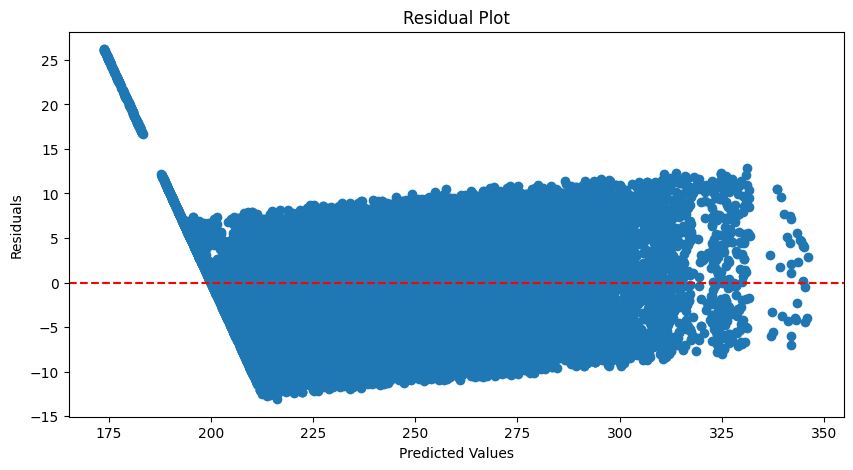

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

The residuals show a clear V-shape, this suggests heteroscedasticity, meaning that the variance of errors is not constant.

This violates the assumption of homoscedasticity (constant variance), which is a key assumption in linear regression.

The model might not be capturing the underlying pattern in the data correctly.
The presence of non-linearity suggests that a linear model may not be the best fit.

**Checking the error is normally distributed or not? - Shapiro Test**


In [ ]:
# Check the Null Hypothesis: Error is normally distributed
from scipy.stats import shapiro
shapiro(np.abs(residuals))

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15697.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.9223560601967224, pvalue=2.1307308415415305e-66)

Since the p-value is extremely small (< 0.05), we reject H₀ → the residuals do not follow a normal distribution.

**Check for residual independence**

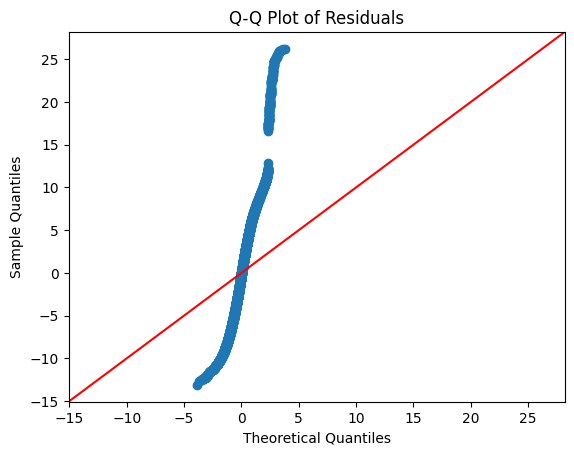

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats

# Create the Q-Q plot
fig = sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

The residuals are not independent

## Random Forest Model

In [ ]:
# Initialize and train the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # Adjust n_estimators as needed
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest Mean Squared Error: {rf_mse}")
print(f"Random Forest R-squared: {rf_r2}")

# Calculate RMSE for Random Forest
rf_rmse = np.sqrt(rf_mse)
print(f"Random Forest Root Mean Squared Error: {rf_rmse}")

Random Forest Mean Squared Error: 11.008068650060522
Random Forest R-squared: 0.9893320660022987
Random Forest Root Mean Squared Error: 3.317840962140971


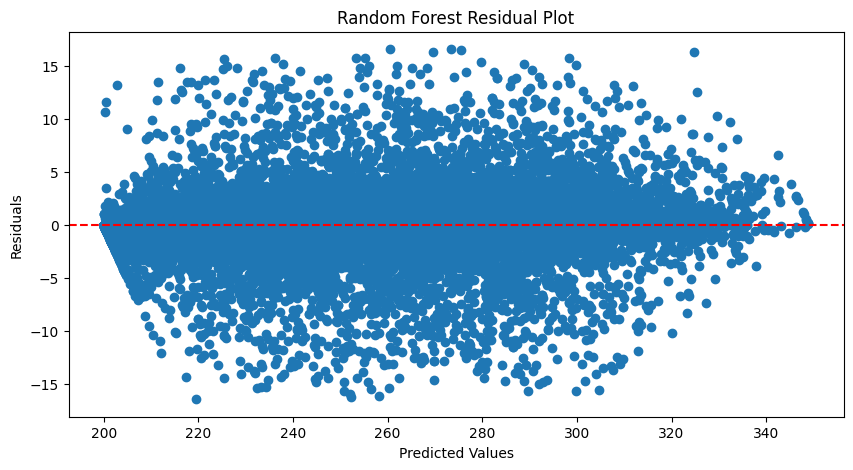

In [ ]:
# Calculate residuals
rf_residuals = y_test - rf_y_pred

# Plotting the residuals
plt.figure(figsize=(10, 5))
plt.scatter(rf_y_pred, rf_residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Random Forest Residual Plot")
plt.show()

The error are homoscedastic in nature.

**Feature Importance using the Random forest**

<ipython-input-241-bb4d1f21059d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")


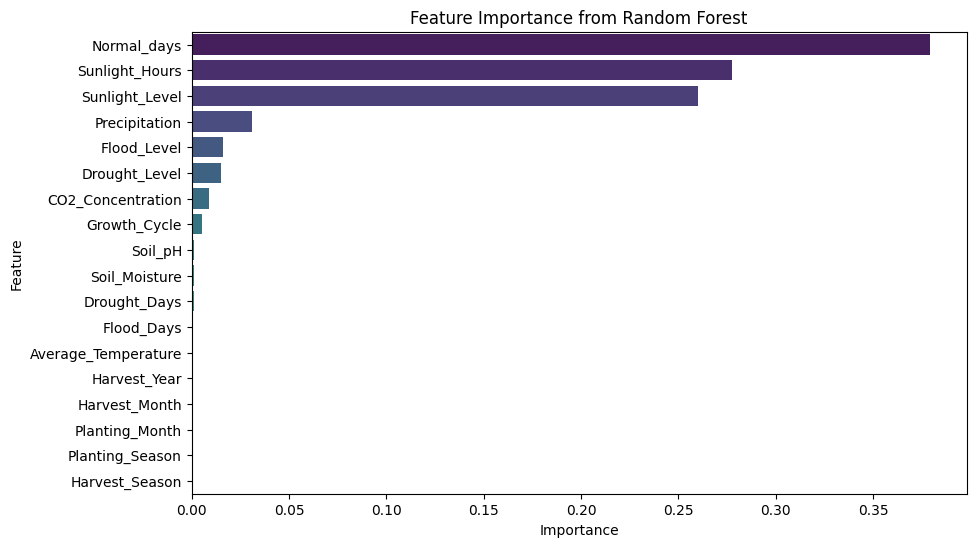

In [ ]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Finding the optimum feature values to maximize the yield**

In [ ]:
def find_optimal_conditions_gt_253(model, X_train):
    # Get feature importances
    importances = model.feature_importances_
    feature_names = X_train.columns

    # Identify the top N important features (adjust N as needed)
    N = 8  # Example: Top 5 features
    top_features = feature_names[np.argsort(importances)[::-1][:N]]

    # Create a DataFrame to store results
    results = []

    # Iterate through possible combinations of top features
    for i in range(10000):  # Increased iterations for a more thorough search
      conditions = {}
      for col in top_features:
        conditions[col] = np.random.uniform(X_train[col].min(), X_train[col].max())

      # Convert the conditions dictionary to a DataFrame with all columns
      # and fill missing values with 0
      condition_df = pd.DataFrame([conditions], columns=X_train.columns).fillna(0)

      # Make prediction
      predicted_yield = model.predict(condition_df)
      if predicted_yield[0] > 253:  # Check if yield is greater than 253
          results.append({**conditions, 'predicted_yield': predicted_yield[0]})

    return pd.DataFrame(results)

optimal_conditions_df = find_optimal_conditions_gt_253(rf_model, X_train)

In [ ]:
# Reverse the standardization for all conditions in optimal_conditions_df
optimal_conditions_original = []
for index, row in optimal_conditions_df.iterrows():
    conditions_scaled = row.drop('predicted_yield')
    conditions_df = pd.DataFrame([conditions_scaled], columns=X_train.columns).fillna(0)
    conditions_scaled_df = conditions_df[columns_to_scale]
    conditions_original = scaler.inverse_transform(conditions_scaled_df)
    conditions_original = pd.DataFrame(conditions_original, columns=columns_to_scale)
    conditions_original['predicted_yield'] = row['predicted_yield']
    optimal_conditions_original.append(conditions_original)

optimal_conditions_original = pd.concat(optimal_conditions_original, ignore_index=True)


# Calculate the average of all input conditions (destandardized)
average_conditions = optimal_conditions_original.mean()

print("\nAverage Input Conditions (Original Scale):")
average_conditions



Average Input Conditions (Original Scale):


Growth_Cycle            139.445380
Sunlight_Hours            8.771500
Precipitation           499.640566
Average_Temperature      25.015621
Drought_Days             62.878496
Flood_Days               63.086197
Soil_Moisture            60.052444
Soil_pH                   5.998048
CO2_Concentration       425.624867
Harvest_Year           2018.172343
Sunlight_Level            2.352166
Flood_Level               1.449898
Drought_Level             1.470964
Planting_Month            6.427010
Harvest_Month             6.650574
Normal_days              58.452452
Planting_Season           1.767083
Harvest_Season            1.722118
predicted_yield         276.411561
dtype: float64